# 1. Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
## Checking Physical GPU
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Extract Data

In [5]:
df = pd.read_csv('/content/titanic.csv')
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# 3. Preprocessing Data
Sebelum masuk ke deep learning, data harus dipreprocessed model.

## 3.1. Data Splitting

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

## 3.2. Feature
1. imputing missing value
2. scaling data
3. polynomial features
4. onehot encoding, etc.

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pre = Pipeline([("num_imputer",SimpleImputer(strategy="median")),
                    ("transform",MinMaxScaler()),
                    ("poly",PolynomialFeatures(degree=2,interaction_only=False,include_bias=False))])
cat_pre = Pipeline([("cat_imputer",SimpleImputer(strategy="most_frequent")),
                    ("onehot",OneHotEncoder(handle_unknown='ignore'))])

num_kolom = X_train.select_dtypes(include=np.number).columns
cat_kolom = X_train.select_dtypes(exclude=np.number).columns

preprocessing = ColumnTransformer([("num_pipe", num_pre, num_kolom),
                                   ("cat_pipe", cat_pre, cat_kolom)])

In [21]:
preprocessing.fit(X_train)

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('transform', MinMaxScaler()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False))]),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Sex', 'Embarked'], dtype='object'))])

In [22]:
X_train_clean = preprocessing.transform(X_train)
X_test_clean  = preprocessing.transform(X_test)

### Sanity Check

In [23]:
X_train.shape,X_train_clean.shape

((712, 7), (712, 25))

In [24]:
pd.DataFrame(X_train_clean,columns=preprocessing.get_feature_names_out())

,num_pipe__Pclass,num_pipe__Age,num_pipe__SibSp,num_pipe__Parch,num_pipe__Fare,num_pipe__Pclass^2,num_pipe__Pclass Age,num_pipe__Pclass SibSp,num_pipe__Pclass Parch,num_pipe__Pclass Fare,...,num_pipe__SibSp Parch,num_pipe__SibSp Fare,num_pipe__Parch^2,num_pipe__Parch Fare,num_pipe__Fare^2,cat_pipe__Sex_female,cat_pipe__Sex_male,cat_pipe__Embarked_C,cat_pipe__Embarked_Q,cat_pipe__Embarked_S
0,1.0,0.352852,0.000,0.000000,0.110272,1.00,0.352852,0.0000,0.000000,0.110272,...,0.000000,0.000000,0.000000,0.000000,0.012160,0.0,1.0,0.0,0.0,1.0
1,0.5,0.352852,0.000,0.000000,0.000000,0.25,0.176426,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0
2,0.0,0.352852,0.000,0.000000,0.432884,0.00,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.187389,0.0,1.0,0.0,0.0,1.0
3,1.0,0.220910,0.000,0.166667,0.018250,1.00,0.220910,0.0000,0.166667,0.018250,...,0.000000,0.000000,0.027778,0.003042,0.000333,1.0,0.0,0.0,0.0,1.0
4,0.5,0.384267,0.125,0.166667,0.051237,0.25,0.192134,0.0625,0.083333,0.025618,...,0.020833,0.006405,0.027778,0.008539,0.002625,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.352852,0.000,0.000000,0.015379,1.00,0.352852,0.0000,0.000000,0.015379,...,0.000000,0.000000,0.000000,0.000000,0.000237,1.0,0.0,0.0,1.0,0.0
708,0.0,0.434531,0.000,0.000000,1.000000,0.00,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,1.0,0.0,0.0
709,1.0,0.597889,0.125,0.500000,0.067096,1.00,0.597889,0.1250,0.500000,0.067096,...,0.062500,0.008387,0.250000,0.033548,0.004502,1.0,0.0,0.0,0.0,1.0
710,0.0,0.585323,0.000,0.000000,0.075147,0.00,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005647,0.0,1.0,0.0,0.0,1.0


# 4. Build The ANN Model

## 4.1. Model Architecture

25

In [32]:
# ## No hidden layer
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(input_dim = X_train_clean.shape[1],units=1)
# ])


## with hidden layer
model = tf.keras.Sequential([
    ## Input Layer yang terhubung langsung ke hidden layer pertama
    tf.keras.layers.Dense(input_dim = X_train_clean.shape[1],units=16,activation='sigmoid'),

    ## hidden layer 2
    tf.keras.layers.Dense(units=8,activation='sigmoid'),

    ## Output Layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')

])

## 4.2. Optimizer

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
              metrics=['accuracy'])

## 4.3. Summary

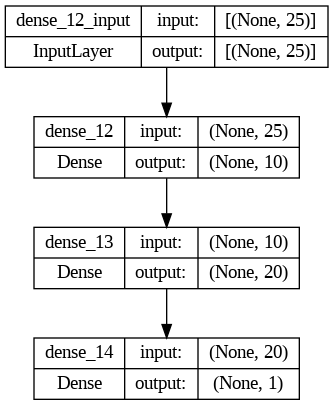

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                260       
                                                                 
 dense_13 (Dense)            (None, 20)                220       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 5. Training

In [ ]:
trained_model = model.fit(X_train_clean,y_train,validation_split=0.2,epochs=200)

# 6. Model Performance

In [47]:
from sklearn.metrics import classification_report

def model_performance(model,X,y,probability_threshold=0.5):
    y_predicted = model.predict(X)>=probability_threshold
    print(classification_report(y,y_predicted))

In [48]:
model_performance(model,X_train_clean,y_train,probability_threshold=0.5)
model_performance(model,X_test_clean,y_test,probability_threshold=0.5)

23/23 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       439
           1       0.82      0.66      0.73       273

    accuracy                           0.82       712
   macro avg       0.82      0.79      0.80       712
weighted avg       0.82      0.82      0.81       712

6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       110
           1       0.82      0.59      0.69        69

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179

